## Kmeans Clustering for Image Segmentation
* semantic segmentation and instance segmentation
* Kmeans clustering
  * Choose the number of clusters K
  * Select at random K prototypes
  * Assign each data point to the closest prototype (construct K clusters) 
  * Compute and place the new prototype of each cluster
  * Reassign each data point to the new closest prototype. If any reassignment. took place, go to the previous step, otherwise, the clustering is finished

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

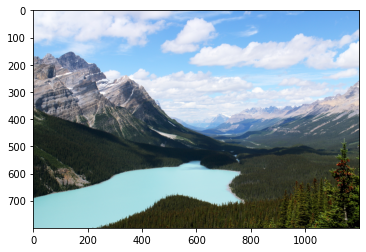

In [8]:
original_image = cv2.imread(".\\images\\image01.jpg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)/255

In [14]:
# perform kmeans clustering
## 停止条件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)
## 初始化中心数和尝试的次数
K = 3
attempts=10
_,label,center = cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center*255)
print(center)
label.flatten().shape,center.shape

[[183 213 236]
 [ 39  45  35]
 [ 96 108 117]]


((960000,), (3, 3))

In [15]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

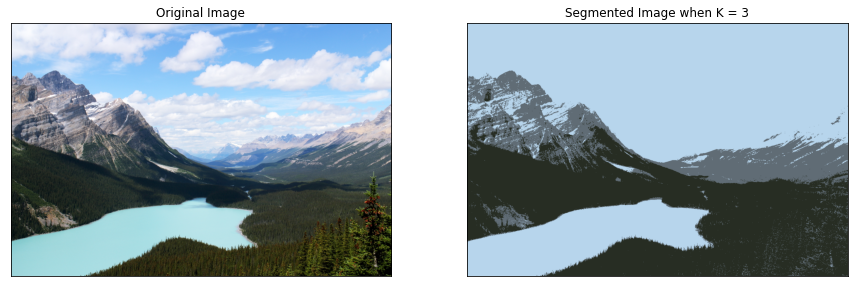

In [16]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = {:d}'.format(K)), plt.xticks([]), plt.yticks([])
plt.show()

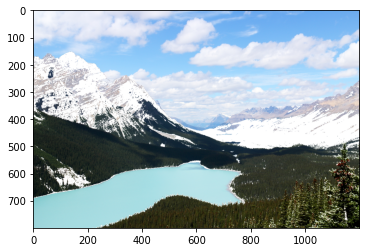

In [29]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(img)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[label.flatten() == cluster] = [255, 255, 255]
# convert back to original shape
masked_image = masked_image.reshape(img.shape)
# show the image
plt.imshow(masked_image)
plt.show()